In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 15.6 MB/s 
     |████████████████████████████████| 18.0 MB 60 kB/s 
     |████████████████████████████████| 238 kB 43.9 MB/s 
     |████████████████████████████████| 200 kB 23.5 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 50.3 MB/s 
     |████████████████████████████████| 943 kB 52.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 207 kB/s 
     |████████████████████████████████| 49 kB 3.5 MB/s 
     |████████████████████████████████| 37.5 MB 458 kB/s 
     |████████████████████████████████| 3.6 MB 47.6 MB/s 
     |████████████████████████████████| 113 kB 44.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=1c6e8a26a1c28df61cde3fa38dd6bfcb9241b50403dac41d0de85583802ec95c
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c9

In [ ]:
!pip install gym

In [ ]:
# Useful additional packages
import gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi, sqrt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, assemble, Aer
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import *
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter


In [ ]:
from qiskit import IBMQ
# IBMQ.save_account(TOKEN)
#IBMQ.enable_account('94d92395742a4f2ef1ec1455e8d278ee072c576772e70ac4eef2581a78a7c02aae0b52c4c56cddfa5705c9e69ce794beac9843e9d5617b81a5f7038b2feb5e72')

#provider=IBMQ.get_provider(hub='ibm-q-hub-ntu', group='ntu-internal', project='quantum-ml')
#provider=IBMQ.get_provider(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')
#backend = provider.get_backend('ibmq_armonk')
backend = Aer.get_backend('aer_simulator_statevector')

Episode 0/5 ||  Current Iteration Reward 200.0
[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]
Episode 1/5 ||  Current Iteration Reward 200.0
[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0

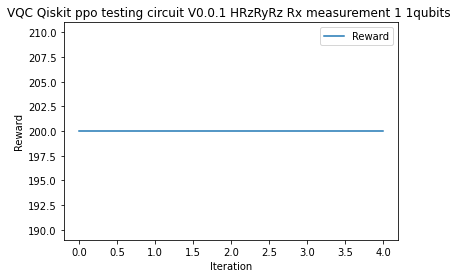

In [ ]:
env_name = 'CartPole-v0'
import math
EPISODES = 5

# Transfer the state to the angle.
def get_angles(x):
    beta0 = math.atan(x[0])
    beta1 = math.atan(x[1])
    beta2 = math.atan(x[2])
    beta3 = math.atan(x[3])
    return [beta0, beta1, beta2, beta3]

class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction  with the quantum circuit 
    """
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits)
        all_qubits = [i for i in range(n_qubits)]
        
        self.theta_0 = qiskit.circuit.Parameter('s1')
        self.theta_1 = qiskit.circuit.Parameter('s2')
        self.theta_2 = qiskit.circuit.Parameter('s3')
        self.theta_3 = qiskit.circuit.Parameter('alpha')

        self._circuit.h(all_qubits)
        self._circuit.rz(self.theta_0, all_qubits)
        self._circuit.ry(self.theta_1, all_qubits)
        self._circuit.rz(self.theta_2, all_qubits)
        self._circuit.rx(self.theta_3, all_qubits)
        
        self._circuit.measure_all()
        # ---------------------------
        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        
        s1 = thetas[1]
        s2 = thetas[2]
        s3 = thetas[3]
        # trainable parameters alpha
        alpha = -0.6443639
        
        t_qc = transpile(self._circuit,self.backend)
        qobj = assemble(t_qc,shots=self.shots,
        parameter_binds = [{self.theta_0:s1, self.theta_1:s2, self.theta_2: s3,self.theta_3: alpha}])  
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)

        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        expectation = -expectation +(1-expectation)
        return expectation ,expectation

def softmax(x):
    
    f_0 = np.exp(x[0]) / np.sum(np.exp(x))
    f_1 = np.exp(x[1]) / np.sum(np.exp(x))
    return [f_0,f_1]

class VQC():
    def get_action(self, state):

        circuit = QuantumCircuit(1, backend, 1000)
        measurement_0,measurement_1 = circuit.run(state)

        # trainable parameters of NN and bias
        measurement_0 = 15.369 * measurement_0  +0.12570988     
        measurement_1 = -15.1928 * measurement_1 -0.1257098
        action_prob = [measurement_0,measurement_1]
        action_prob = softmax(action_prob)
        action = np.random.choice(2,p=action_prob)
        return action

def main():
    env = gym.make(env_name)
    env.seed(34)
    num_inputs = env.observation_space.shape[0]
    num_actions = env.action_space.n

    get_action=VQC()
    all_rewards = []
    all_episode_action = []
    
    for e in range(EPISODES):
        done = False
        rewards=0
        s1 = env.reset()
        episode_action = []
        while not done:
            state_angle = get_angles(s1)
            action = get_action.get_action(state_angle)
            episode_action.append(action)
            s2, reward, done, _ = env.step(action)
            s1 = s2 
            rewards += reward

        all_rewards.append(rewards)
        print("\rEpisode {}/{} ||  Current Iteration Reward {}".format(e,EPISODES,rewards))
        print(episode_action)
        all_episode_action.append(episode_action)
    print(all_episode_action)
    np.save("VQC Qiskit ppo testing circuit V0.0.0 HRzRyRz Rx measurement 1 1qubits rewards", np.asarray(all_rewards))
    plt.title("VQC Qiskit ppo testing circuit V0.0.1 HRzRyRz Rx measurement 1 1qubits ")
    plt.plot(all_rewards, label='Reward')
    plt.legend()
    plt.ylabel('Reward')
    plt.xlabel('Iteration')
    plt.show()


if __name__=="__main__":
    main()